# Introducción a Redes Neuronales Artificiales - Parte 1/3

### ¡Les doy la bienvenida a este breve tutorial!
La idea general de esta serie es contruir una Red Neuronal Artificial desde cero, empezando por su unidad fundamental, el Perceptrón, y después ir agregando elementos poco a poco hasta que podamos construir y usar una red neuronal pre-entrenada lista para ser aplicada en tareas complejas. Durante este proceso, explicaremos cada paso de la manera más accesible posible.

Es un tema extenso así que lo dividiremos en partes más pequeñas para hacerlo más sencillo de manejar.

¡Ahora, empecemos!

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.rcParams['figure.dpi'] = 100
sns.set_style('darkgrid')

## **Perceptrón**

El *perceptrón de Rosenblatt (1962)* es un **algoritmo de clasificación binaria** que toma un vector como input, lo procesa, y genera un único resultado a través de una función de activación no lineal llamada "función escalón"(*step function* en inglés).

 - Cada input es un número y está asociado con un *peso* (también un número).

 - Normalmente, existe un término bias (o constante).

 - Se hace una suma ponderara de todos estos elementos y después se pasa a través de una función escalón que devolverá un *resultado binario*, 1 o 0 (depende de quién lo defina puede ser +1 o -1).

En la siguiente imagen puedes ver una representación de todos estos elementos.

<img src="images/perceptron-6168423.png" width="600">


### Función escalón 

Una función escalón es un tipo de función de activación. En los próximos tutoriales hablaremos sobre otros tipos de funciones de activación, pero la idea principal es que estas funciones realizan transformaciones no lineales, permitiendole al algoritmo generar un resultado más versátil.
 
Definimos a la función escalón de la siguiente forma:

\begin{equation}
f(z) = 
\begin{cases}
    1 & \text{si }~~ z >= 0 \\
    0 & \text{si }~~ z < 0
\end{cases}
\end{equation}

Esto significa que el resultado será 1 si el input es mayor o igual a 0, y 0 si el input es más pequeño que 0.

Ahora pasemos a la parte más divertida de escribir el código para esta función, y graficarla.

In [2]:
def funcion_escalon(z: float) -> float:
  # Devuelve el resultado de la función para un número dado
  return 1.0 if z >= 0 else 0.0

Veamos si funciona

In [3]:
print(funcion_escalon(-0.5))
print(funcion_escalon(0.5))

0.0
1.0


¡Genial! Parece estar devolviendo exactamente lo que necesitamos.

Ahora podemos intentar graficarla con más puntos para ver cómo se comporta la función.

Generamos un array de 25 valores dentro del rango  -0.5 and 0.5.

In [4]:
y = np.linspace(-0.5, 0.5, 25)
print(y)

[-0.5        -0.45833333 -0.41666667 -0.375      -0.33333333 -0.29166667
 -0.25       -0.20833333 -0.16666667 -0.125      -0.08333333 -0.04166667
  0.          0.04166667  0.08333333  0.125       0.16666667  0.20833333
  0.25        0.29166667  0.33333333  0.375       0.41666667  0.45833333
  0.5       ]


Pasamos cada uno de esos valores por la función escalón.

In [5]:
s = np.array([funcion_escalon(i) for i in y])
print(s)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


Y graficamos estos dos arrays juntos.

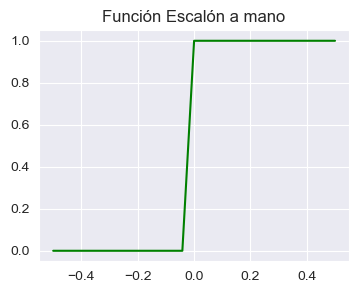

In [6]:
plt.figure(figsize=(4,3))
plt.title("Función Escalón a mano")
plt.plot(y, s, color="green")
plt.show()

Espero que ahora esté claro porqué se llama *función escalón*.

Claramente podemos ver que se comporta cómo esperamos: le asigna 0 a cada valor por debajo de 0, y 1 a todos los valores por encima de cero.

Así es como esta función *clasifica* cosas; la magia detrás del perceptrón y la base de las RNA. Basada en los valores ingresados, crea una no-linealidad que elige una clase o la otra.

### Definimos una función perceptrón

Como ya tenemos nuestra función escalón lista, podemos definir al perceptrón en sí mismo.

Debe tomar un array de inputs y uno de pesos, realizar un producto escalar entre ellos, sumar el término de bias y, finalmente, devolver el resultado de la función escalón.

Escribamos en código.


In [7]:
def perceptron(inputs: np.array, pesos: np.array, bias: float) -> float:
  # Hace el producto escalar de inputs y pesos, suma el bias
  # Devuelve el resultado de la función escalón del total
  total = np.dot(pesos, inputs) + bias
  return funcion_escalon(total)

Elegimos algunos inputs y pesos para pasarle a nuestro perceptrón.

Los inputs serían variables correspondientes a un único punto de nuestro set de datos, y los pesos que le corresponden a cada una de estas variables normalmente se inicializan con valores aleatorios pequeños o ceros.

In [8]:
inputs = np.array([2, 1, 0.5])
pesos = np.array([0.1, 0.2, 0.1]) 
bias = 1

Y, finalmente, pasamos todos estos elementos a la función perceptrón que definimos arriba y obtenemos su "predicción".

In [9]:
print("Los inputs corresponden a las clase:", perceptron(inputs, pesos, bias))    # 1.0

Los inputs corresponden a las clase: 1.0


Probá generando números aleatorios para inputs y pesos y fijate cómo cambian las predicciones.

In [10]:
inputs = np.random.randint(-5, 5, 4)
print(inputs)
pesos = np.random.rand(1, 4)
print(pesos)

print("Los inputs corresponden a la clase:", perceptron(inputs, pesos, bias))

[ 2 -5  3 -1]
[[0.83411938 0.66806464 0.64216227 0.54331545]]
Los inputs corresponden a la clase: 1.0


### Definiendo una "Neurona"

Hasta ahorahemos definido algunas funciones que, en conjunto, forman un algoritmo básico.

Como nuestro próximo paso, escribiremos una clase de python llamada Neurona que:
 - Se inicializa con los pesos y bias
 - Toma inputs que pasan por un método de **feedforward**, igual a la función de perceptrón que definimos arriba.
 - El método de feedforward hace el producto escalar y devuelve el resultado de la función escalón.

In [11]:
class Neurona:
  def __init__(self, pesos, bias):
    self.pesos = pesos
    self.bias = bias

  def funcion_escalon(self, z):
    return 1.0 if z >= 0 else 0.0

  def feedforward(self, inputs):
    total = np.dot(self.pesos, inputs) + self.bias
    return self.funcion_escalon(total)

In [12]:
inputs = np.array([2, 1, 0.5])       # x1 = 2, x2 = 3
pesos = np.array([0.1, 0.2, 0.1]) # w1 = 0, w2 = 1
bias = 1

In [13]:
neurona = Neurona(pesos, bias)
print("Predicción de la Neurona: ", neurona.feedforward(inputs))  

Predicción de la Neurona:  1.0


De nuevo, podemos probar la clase con valores aleatorios para ver cómo varían las predicciones.

In [14]:
inputs = np.random.randint(-5, 5, 4)
print(inputs)
pesos = np.random.rand(1, 4)
print(pesos)

neurona = Neurona(pesos, bias)
print("Predicción de la Neurona: ", neurona.feedforward(inputs))  

[ 2 -5  4  0]
[[0.0810413  0.90931446 0.60848213 0.59108886]]
Predicción de la Neurona:  0.0


## **Perceptrón Multicapa**

Debido a su sencilla naturaleza, un algorítmo único de perceptrón sólo funciona con datos linealmente separables.

<img src="images/Linearly_Separable_Data_Example.webp">

Para abordar este problema, podemos combinar muchos perceptrones (neuronas) ensamblados en redes. 

La arquitectura más simple de las Redes Neuronales Artificiales es la de Perceptrón Multicapa, donde el resultado de cada capa es el input de la capa siguiente, y todos los nodos (neuronas) de una capa están conectados con las neuronas de la siguiente. Esto también se llama *capa densa* o *completamente conectada* (*dense layer*, *fully connected layer* en inglés). Hablaremos más sobre ellas en los próximos tutoriales.

<img src="images/multilayer_perceptron.png" width="500">

Creamos una red neuronal (combinación de perceptrones) con:
 - dos inputs
 - una capa oculta con dos neuronas (h1, h2)
 - una capa de salida con una neurona (o1)
 
Cada neurona tiene los mismos pesos y bias:
 - p = [0, 1]
 - b = 0


In [15]:
class PerceptronMulticapa():

  def __init__(self):
    pesos = np.array([0, 1])
    bias = 0

    # Usamos la clase Neurona que definimos arriba
    self.h1 = Neurona(pesos, bias)
    self.h2 = Neurona(pesos, bias)
    self.o1 = Neurona(pesos, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # Los inputs de o1 son las salidas de h1 y h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1


Es importante aclarar que esta no es la mejor manera de escribir esta clase; lo hice de esta manera con fines prácticos y pedagógicos.

Además, si en algún momento tenemos que usar una red neurnal para un problema del mundo real, nunca vamos a escribirla a mano, sino que vamos a usar modelos publicados y redes pre-entrenadas. Trabajaremos con este tipo de algoritmos en los próximos tutoriales.

In [16]:
red = PerceptronMulticapa()

In [17]:
inputs = np.array([2, 3])

In [19]:
print("La predicción de la red es: ", red.feedforward(inputs))

La predicción de la red es:  1.0


## Entrenamiento

Hasta ahora hemos definido la estructura más básica de una red neuronal pero, ¿aprendió algo nuestro algoritmo? ¡Todavía no!

La red que hicimos no está entrenada, solo le pasamos inputs y le preguntamos a la red cuál creía que era la clase que le correspondía, pero nunca controlamos si sus respuestas eran correctas.

Para este próximo paso, el entrenamiento de la red, deberíamos definir una **función de pérdida** (el error entre las predicciones y el valor real).

El entrenamiento implica que la red minimice la función de pérdida encontrándo los mejores pesos a través de múltiples iteraciones de feedforward y **retropropagación**.

Para optimizar los pesos y bias que minimicen la función de pérdida usamos un método llamado Descenso por gradiente.

<img src="images/backpropagation.avif" width="500">

Si bien los detalles del método de Descenso por Gradiente van más allá del marco de este tutorial, les recomiendo ver el [video de StatQuest](https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer) sobre el tema si les interesa saber más.

### Fuentes

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. O'Reilly Media, Inc.

Bishop, C. (2006). Patter Recognition and Machine Learning. Springer New York, NY.

Nielsen, M. (2015), Neural Networks and Deep Learning, Determination Press.

StatQuest Gradient Descent: https://www.youtube.com/watch?v=sDv4f4s2SB8

Verma, S. (April, 2021), Implementing the Perceptron Algorithm in Python. Towards Data Science. https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

Zhou, V. (March, 2019), Machine Learning for Beginners: An Introduction to Neural Networks, Towards Data Science. https://towardsdatascience.com/machine-learning-for-beginners-an-introduction-to-neural-networks-d49f22d238f9

Bento, C. (September 2021), Multilayer Perceptron Explained with a Real-Life Example and Python Code: Sentiment Analysis, Towards Data Science. https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141
